In [68]:
from matplotlib.pyplot import figure
import numpy as np
import scri
import matplotlib.pyplot as plt
import numpy as np
import h5py 

In [ ]:

l, m = 2, 2
filename1 = "22_comparison_for_flexible_function/r5Psi0_FiniteRadii_CodeUnits.h5"
filename2 = "22_HOBC/r5Psi0_FiniteRadii_CodeUnits.h5"
R_outerboundary = 30

with h5py.File(filename1,'r') as W1: 
    radii1 = np.array(sorted(W1))

with h5py.File(filename2,'r') as W2: 
    radii2 = np.array(sorted(W2))

radius1=radii1[5]
radius2=radii2[5]

R = int(radius1[1:5])
w1= scri.SpEC.read_from_h5(filename1+'/'+radius1, dataType=scri.psi0, frameType=scri.Inertial, r_is_scaled_out=True, m_is_scaled_out=False)
w2= scri.SpEC.read_from_h5(filename2+'/'+radius2, dataType=scri.psi0, frameType=scri.Inertial, r_is_scaled_out=True, m_is_scaled_out=False)

#time = w.t 
#retarded_time = w.t - R
advanced_time = w1.t + R #- R_outerboundary
plt.semilogy(advanced_time, np.abs(w1.data[:,w1.index(l,m)]), label='Using Flexible Function (new)')
plt.semilogy(advanced_time, np.abs(w2.data[:,w2.index(l,m)]), label='Using old function')


plt.title(r"Testing new interp. function with MP data r5Psi0")
plt.suptitle(r"Boundary Data of $r^5 \Psi_0^{("+str(l)+r","+str(m)+r")}$")
plt.ylabel(r"$r^5 \Psi_0^{("+str(l)+r","+str(m)+r")}$")
plt.xlabel(r"$T+R$")
leg = plt.legend()
plt.show()

# Do More comparison of these two cases to confirm code functionality

Above is the comparison of the results from using the new, flexible interpolation function vs the old interpolation function. More test should be run to confirm that the performace of the two is identical.

Now to comparing the actual runs:
1) HOBC Non-Spinning - MP @ Origin
2) HOBC Spinning - MP @ Origin
3) HOBC Non-Spinning - MP @ Boundary
4) HOBC Spinning - MP @ Boundary

The things I want to compare between these are:
1) Phi.dat
2) w.dat
3) All printed metric amplitudes


In [ ]:
# Plotting Phi.dat

# Re(2,2) is col 17
# Re(3,2) is col 29
PhiCols = [17,18,29,30]
#Subplot params
numOfRows = len(cols)

axs = plt.figure(figsize=(6,12), constrained_layout=True).subplots(numOfRows, 2)
axs.suptitle('Comparing Phi(2,2)')
axs[0,0].set_title('Non-Spinning')
axs[0,1].set_title('Spinning')
for i, column in enumerate(PhiCols):
    Phi_time, Phi_NonSpinning_amp = np.loadtxt('22_BcOrder1_NonSpinning/Phi.dat',usecols=(0,column), comments='#',unpack = True)
    Phi_time, Phi_Spinning_amp = np.loadtxt('22_BcOrder1_Spinning/Phi.dat',usecols=(0,column), comments='#',unpack = True)
    
    # Left Plots
    axs[i,0].plot(Phi_time, Phi_NonSpinning_amp)
    
    # Right Plots
    axs[i,1].plot(Phi_time, Phi_Spinning_amp)
    
plt.show()


#plt.plot(Phi_time, Phi_amp)
#plt.title('Phi(2,2) Non-Spinning - Data @ 15')
#plt.xlabel('Time')
#plt.ylabel('Phi(2,2)')
#plt.yscale("log")




In [ ]:
# Plotting $\dot{U}^+$ for MP Wave @ 15

cols = [9,10,21,22]
#Subplot params
numOfRows = len(cols)

axs = plt.figure(figsize=(6,14), constrained_layout=True).subplots(numOfRows, 2)
for i, column in enumerate(cols):
    Udotplus_time, Udotplus_NonSpinning_amp = np.loadtxt('22_BcOrder1_NonSpinning/YlmCoeff_udotplus.dat',usecols=(0,column), comments='#',unpack = True)
    Udotplus_time, Udotplus_Spinning_amp = np.loadtxt('22_BcOrder1_Spinning/YlmCoeff_udotplus.dat',usecols=(0,column), comments='#',unpack = True)
    
    # Left Plots
    axs[i,0].plot(Udotplus_time[:len(Udotplus_NonSpinning_amp)], Udotplus_NonSpinning_amp)
    axs[i,0].set_title('$\dot{U}^+$ Non-Spinning')
    # Right Plots
    axs[i,1].plot(Udotplus_time[:len(Udotplus_Spinning_amp)], Udotplus_Spinning_amp)
    axs[i,1].set_title('$\dot{U}^+$ Spinning')
plt.show()


In [ ]:
# Plotting $\dot{U}^+$ for MP Wave @ Boundary

cols = [9,10,21,22]
#Subplot params
numOfRows = len(cols)

axs = plt.figure(figsize=(6,14), constrained_layout=True).subplots(numOfRows, 2)
for i, column in enumerate(cols):
    Udotplus_time, Udotplus_NonSpinning_amp = np.loadtxt('22_BcOrder1_NonSpinning/YlmCoeff_udotplus.dat',usecols=(0,column), comments='#',unpack = True)
    Udotplus_time, Udotplus_Spinning_amp = np.loadtxt('22_BcOrder1_Spinning/YlmCoeff_udotplus.dat',usecols=(0,column), comments='#',unpack = True)
    
    # Left Plots
    axs[i,0].plot(Udotplus_time[:len(Udotplus_NonSpinning_amp)], Udotplus_NonSpinning_amp)
    axs[i,0].set_title('$\dot{U}^+$ Non-Spinning')
    # Right Plots
    axs[i,1].plot(Udotplus_time[:len(Udotplus_Spinning_amp)], Udotplus_Spinning_amp)
    axs[i,1].set_title('$\dot{U}^+$ Spinning')
plt.show()

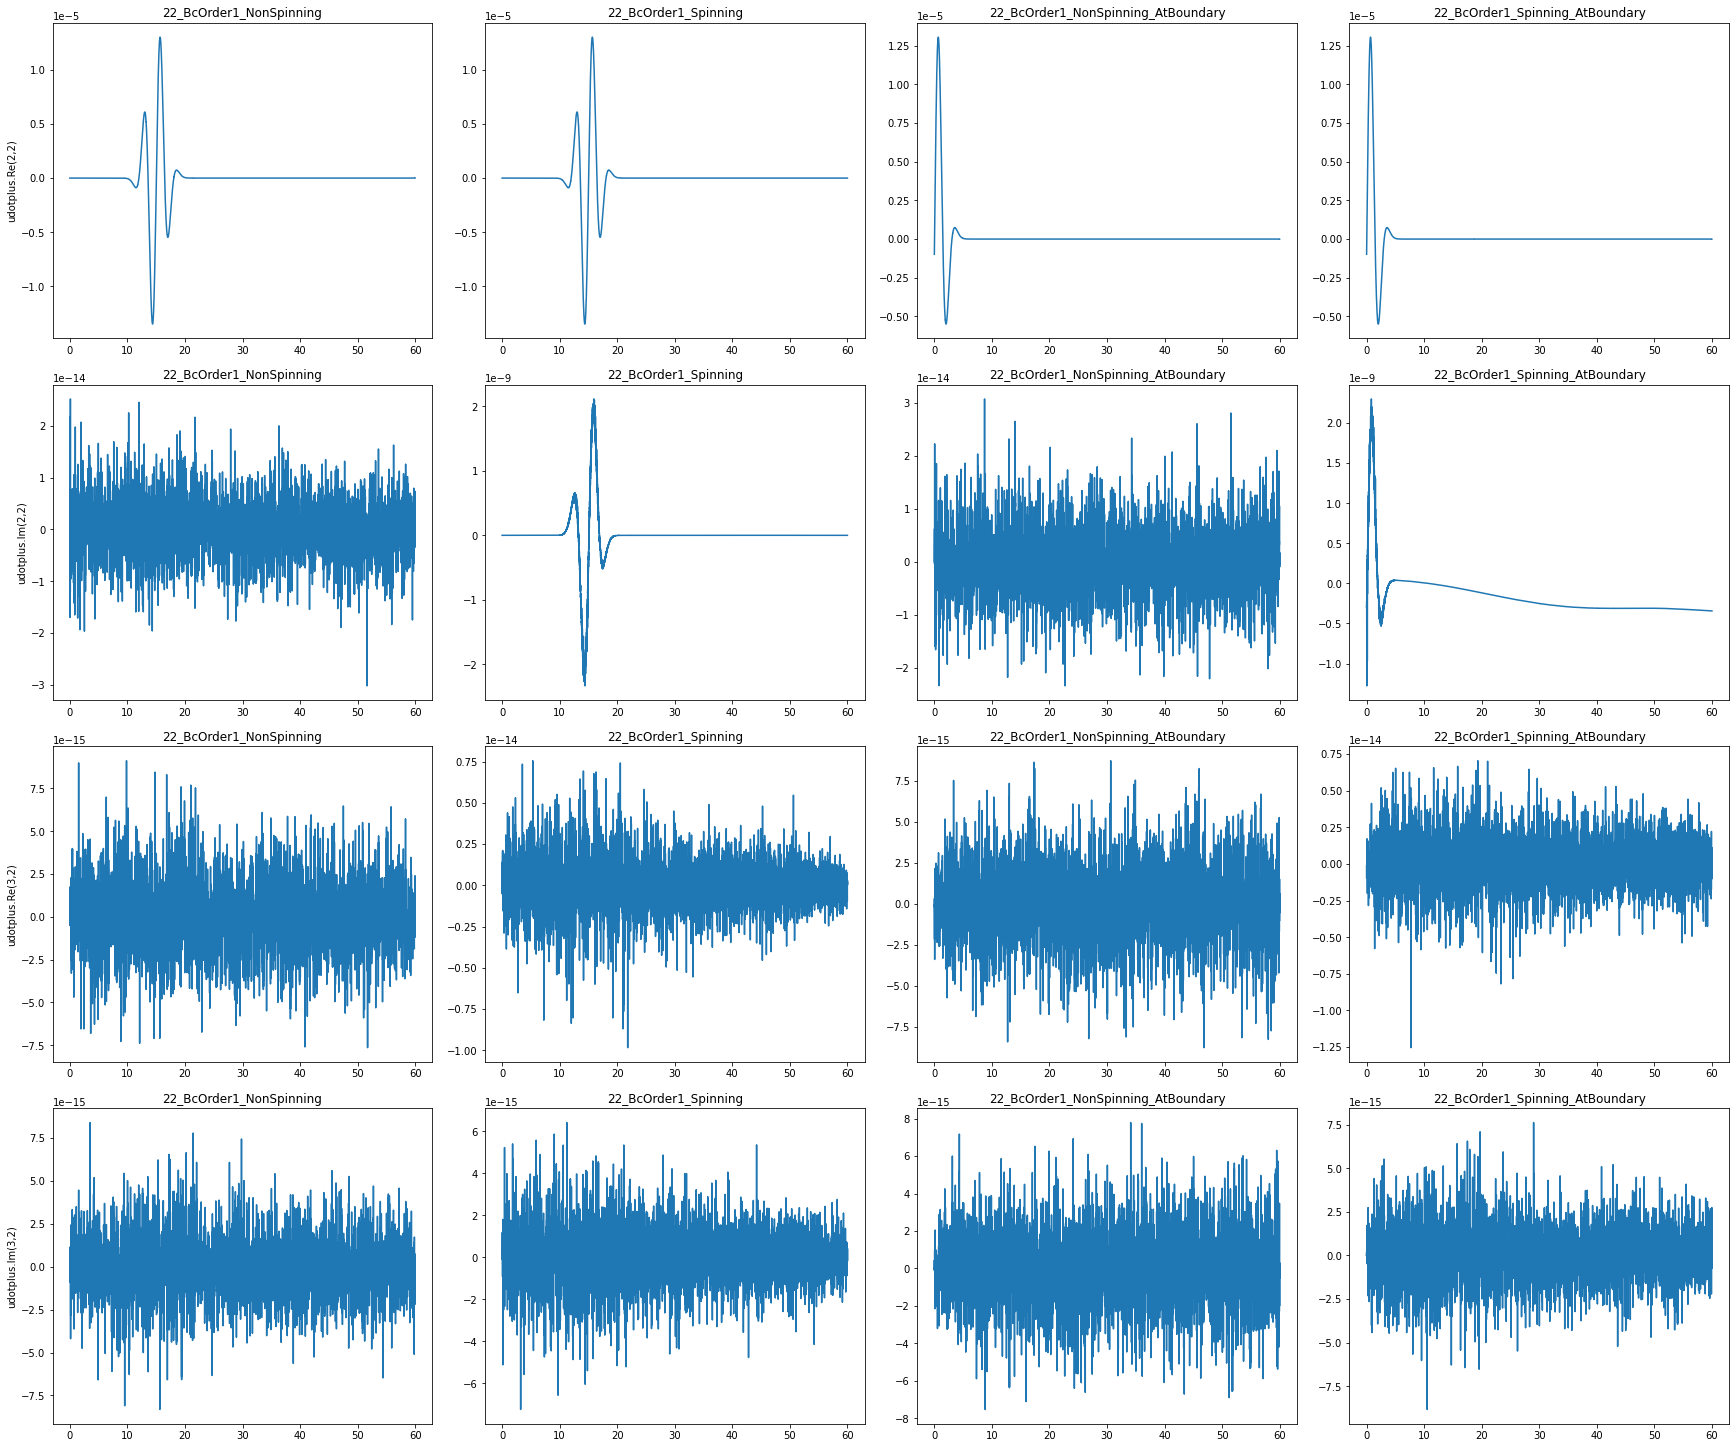

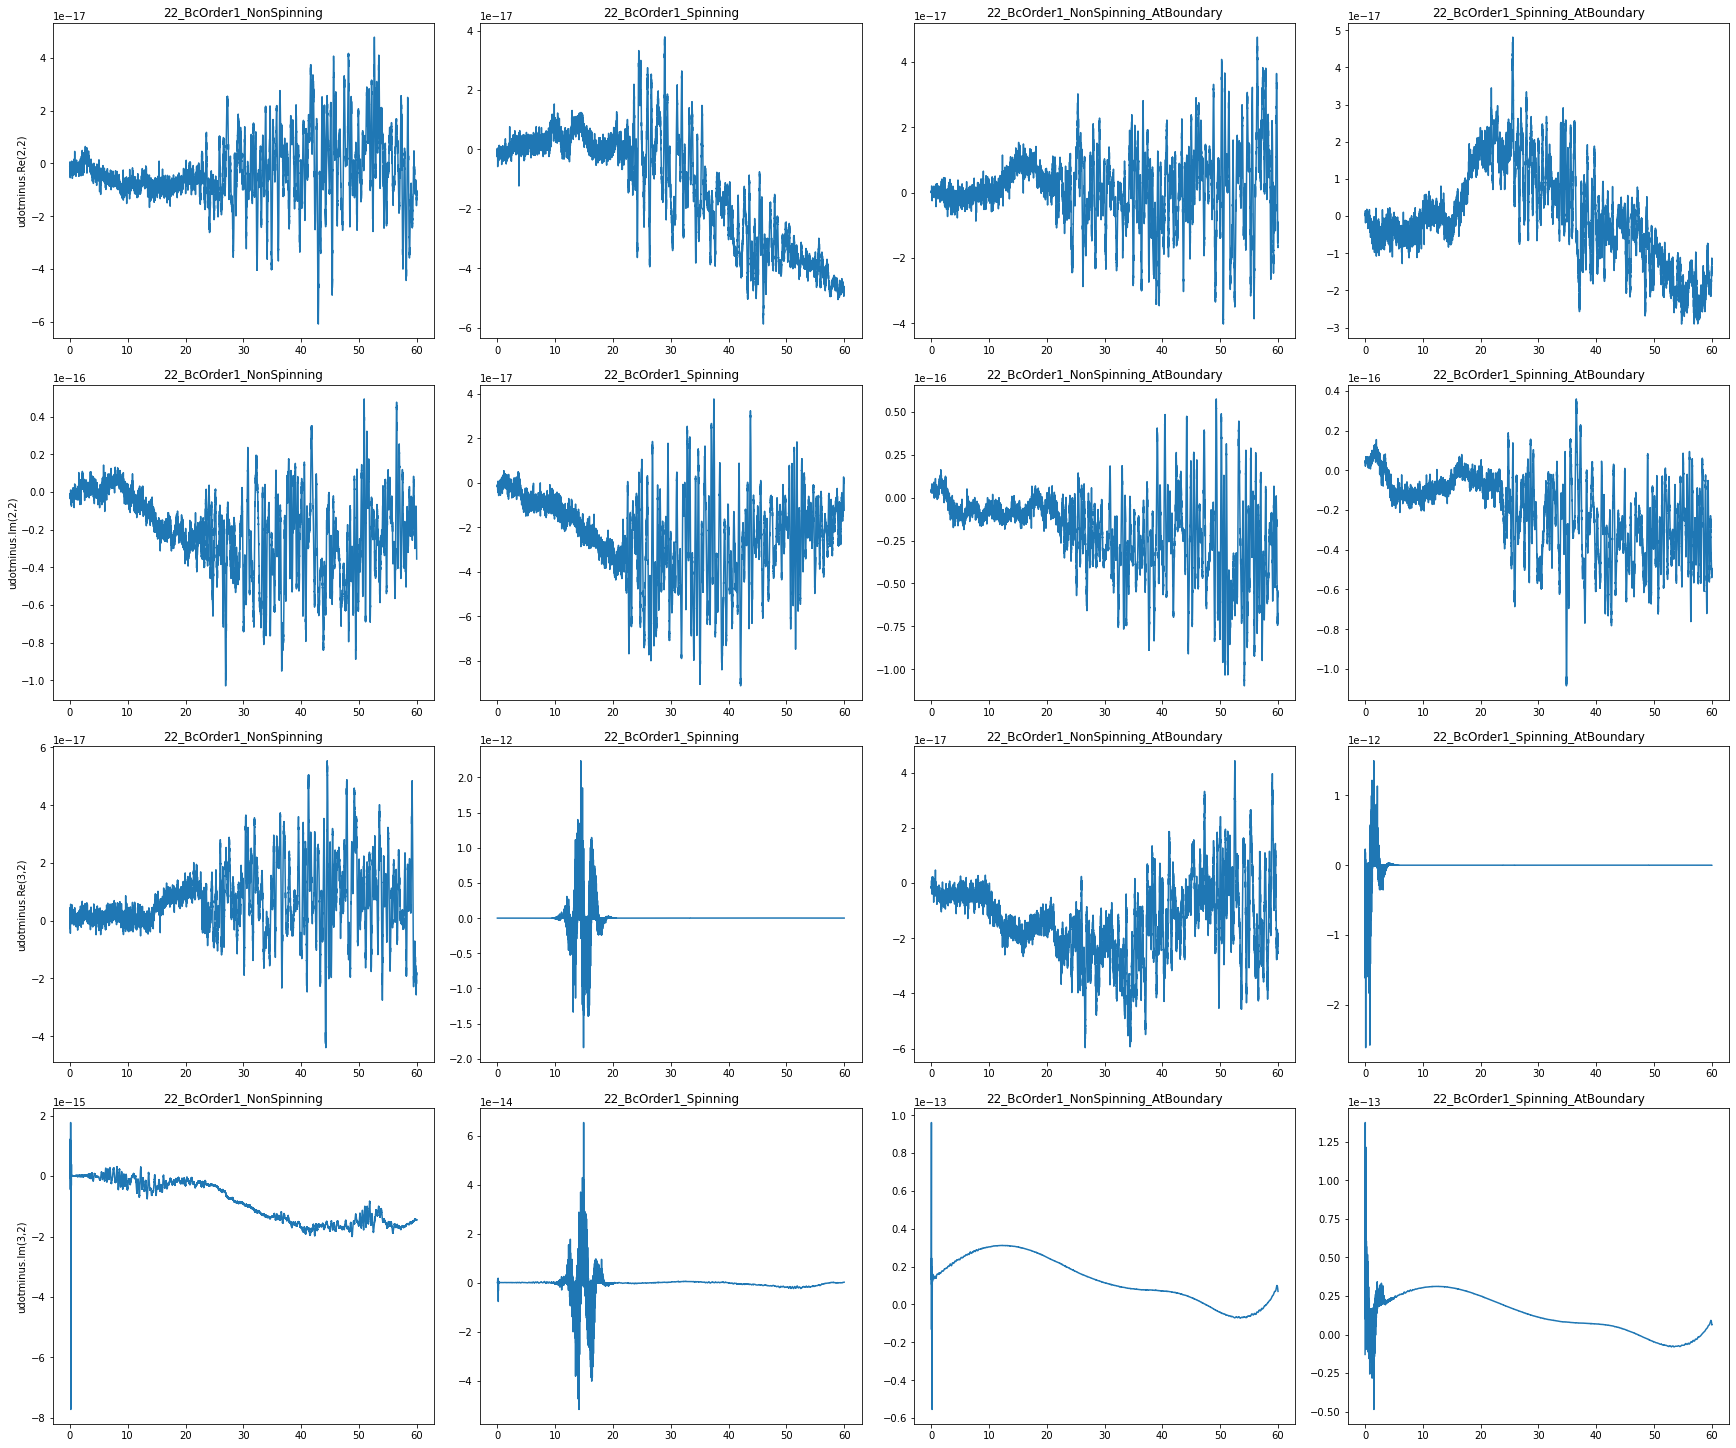

In [1]:
from matplotlib.pyplot import figure
import numpy as np
import scri
import matplotlib.pyplot as plt
import numpy as np
import h5py 

# Header parsing of .dat file
def getHeader(filename):
    collection = []
    with open(filename) as reader:
        line = reader.readline()
        while line[0] == '#':
            collect = False
            columnName = ""
            for letter in line:
                if letter == "=":
                    collect = True
                if collect:
                    columnName+=letter
            collection.append(columnName[2:len(columnName)-1])
            line = reader.readline()
    return collection

# Files to plot
files = ["udotplus", "udotminus"]
cases = ["22_BcOrder1_NonSpinning", "22_BcOrder1_Spinning", "22_BcOrder1_NonSpinning_AtBoundary", "22_BcOrder1_Spinning_AtBoundary"]
wildcard = "/YlmCoeff_"
filetype = ".dat"

columns =  [9,10,21,22] #[17,18]
numOfRows = len(columns)
numOfCols = len(cases)
for file in files:
    # Subplot params
    fig, axs = plt.subplots(numOfRows, numOfCols, figsize=(6*numOfCols,5*numOfRows), constrained_layout=True)
    for i, column in enumerate(columns):
        for j, case in enumerate(cases):
            filename = f'{case}{wildcard}{file}{filetype}'
            header = getHeader(filename)
            var_time, var_amp = np.loadtxt(filename,usecols=(0,column), comments='#',unpack = True)
            # Plots
            axs[i,j].plot(var_time[:len(var_amp)], var_amp)
            axs[i,j].set_title(f'{case}')
            #axs[i,j].set_yscale('symlog')
            if (column % 2) == 0:
               axs[i,0].set_ylabel(f'{header[column+1]}')
            else:
               axs[i,0].set_ylabel(f'{header[column+1]}')

plt.show()
    